✅ Using Apple M1/M2 Metal Performance Shaders
🔥 Step 5: Enhanced Model Training with Advanced Features
🔄 Loading and enhancing all training data...
📁 Found 2185 sequence files
   Processed 100 matches...
   Processed 200 matches...
   Processed 300 matches...
   Processed 400 matches...
   Processed 500 matches...
   Processed 600 matches...
   Processed 700 matches...
   Processed 800 matches...
   Processed 900 matches...
   Processed 1000 matches...
   Processed 1100 matches...
   Processed 1200 matches...
   Processed 1300 matches...
   Processed 1400 matches...
   Processed 1500 matches...
   Processed 1600 matches...
   Processed 1700 matches...
   Processed 1800 matches...
   Processed 1900 matches...
   Processed 2000 matches...
   Processed 2100 matches...
✅ Successfully processed 2185 matches
📊 Created 33423 training examples
✅ Loaded 33423 enhanced training examples
📊 Enhanced input size: 19 features
   Original features: 13
   New features: 6
🔄 Creating enhanced PyTorch dat

/var/folders/y7/49wy45ks7sv3890zpzvhdk1w0000gn/T/ipykernel_4934/2566179275.py:167: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  self.sequences = torch.FloatTensor(self.sequences)


📊 Enhanced dataset split:
   Training: 23396
   Validation: 5013
   Test: 5014
   Batch size: 128
🧠 Enhanced model parameters: 8,619,393


/Users/devadathks004/Desktop/dls-system/venv/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🚀 Starting enhanced model training...
Epoch [1/100], Train Loss: 5305.1542, Val Loss: 5008.4527, RMSE: 70.77
Epoch [2/100], Train Loss: 3715.9130, Val Loss: 3259.8455, RMSE: 57.10
Epoch [3/100], Train Loss: 1709.0022, Val Loss: 1356.5197, RMSE: 36.83
Epoch [4/100], Train Loss: 740.8404, Val Loss: 574.4400, RMSE: 23.97
Epoch [5/100], Train Loss: 538.1984, Val Loss: 542.0011, RMSE: 23.28
Epoch [6/100], Train Loss: 521.7305, Val Loss: 455.7816, RMSE: 21.35
Epoch [10/100], Train Loss: 478.2646, Val Loss: 426.7849, RMSE: 20.66
Epoch [11/100], Train Loss: 483.8171, Val Loss: 437.5934, RMSE: 20.92
Epoch [13/100], Train Loss: 472.5346, Val Loss: 405.2097, RMSE: 20.13
Epoch [16/100], Train Loss: 436.8325, Val Loss: 388.8643, RMSE: 19.72
Epoch [17/100], Train Loss: 416.4185, Val Loss: 368.4658, RMSE: 19.20
Epoch [18/100], Train Loss: 389.7345, Val Loss: 346.4226, RMSE: 18.61
Epoch [19/100], Train Loss: 344.1483, Val Loss: 307.2193, RMSE: 17.53
Epoch [20/100], Train Loss: 306.9913, Val Loss: 260.

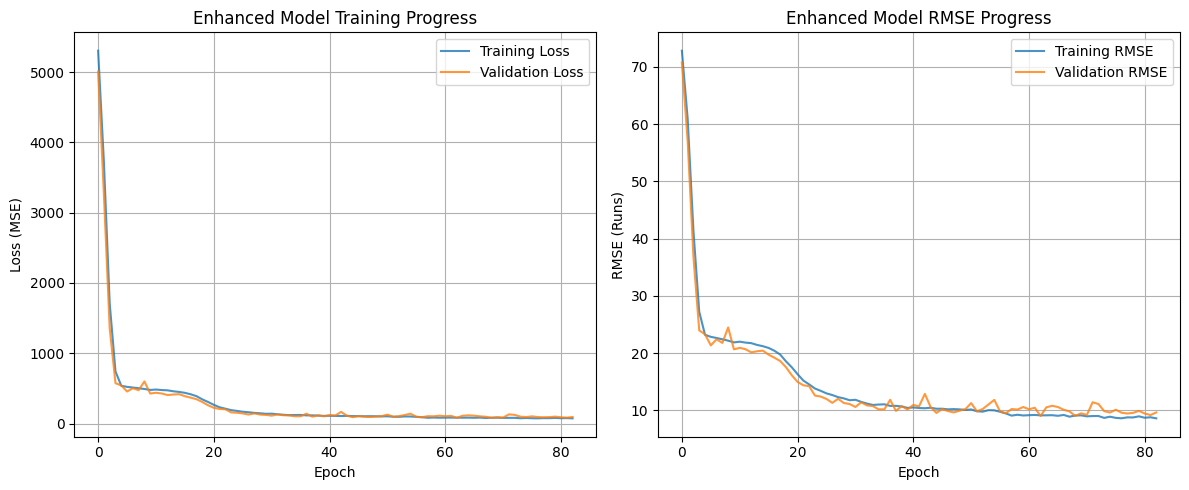


🎯 ENHANCED MODEL RESULTS:
RMSE: 7.86 runs
MAE: 4.21 runs
R² Score: 0.9645
Best Validation Loss: 81.1678


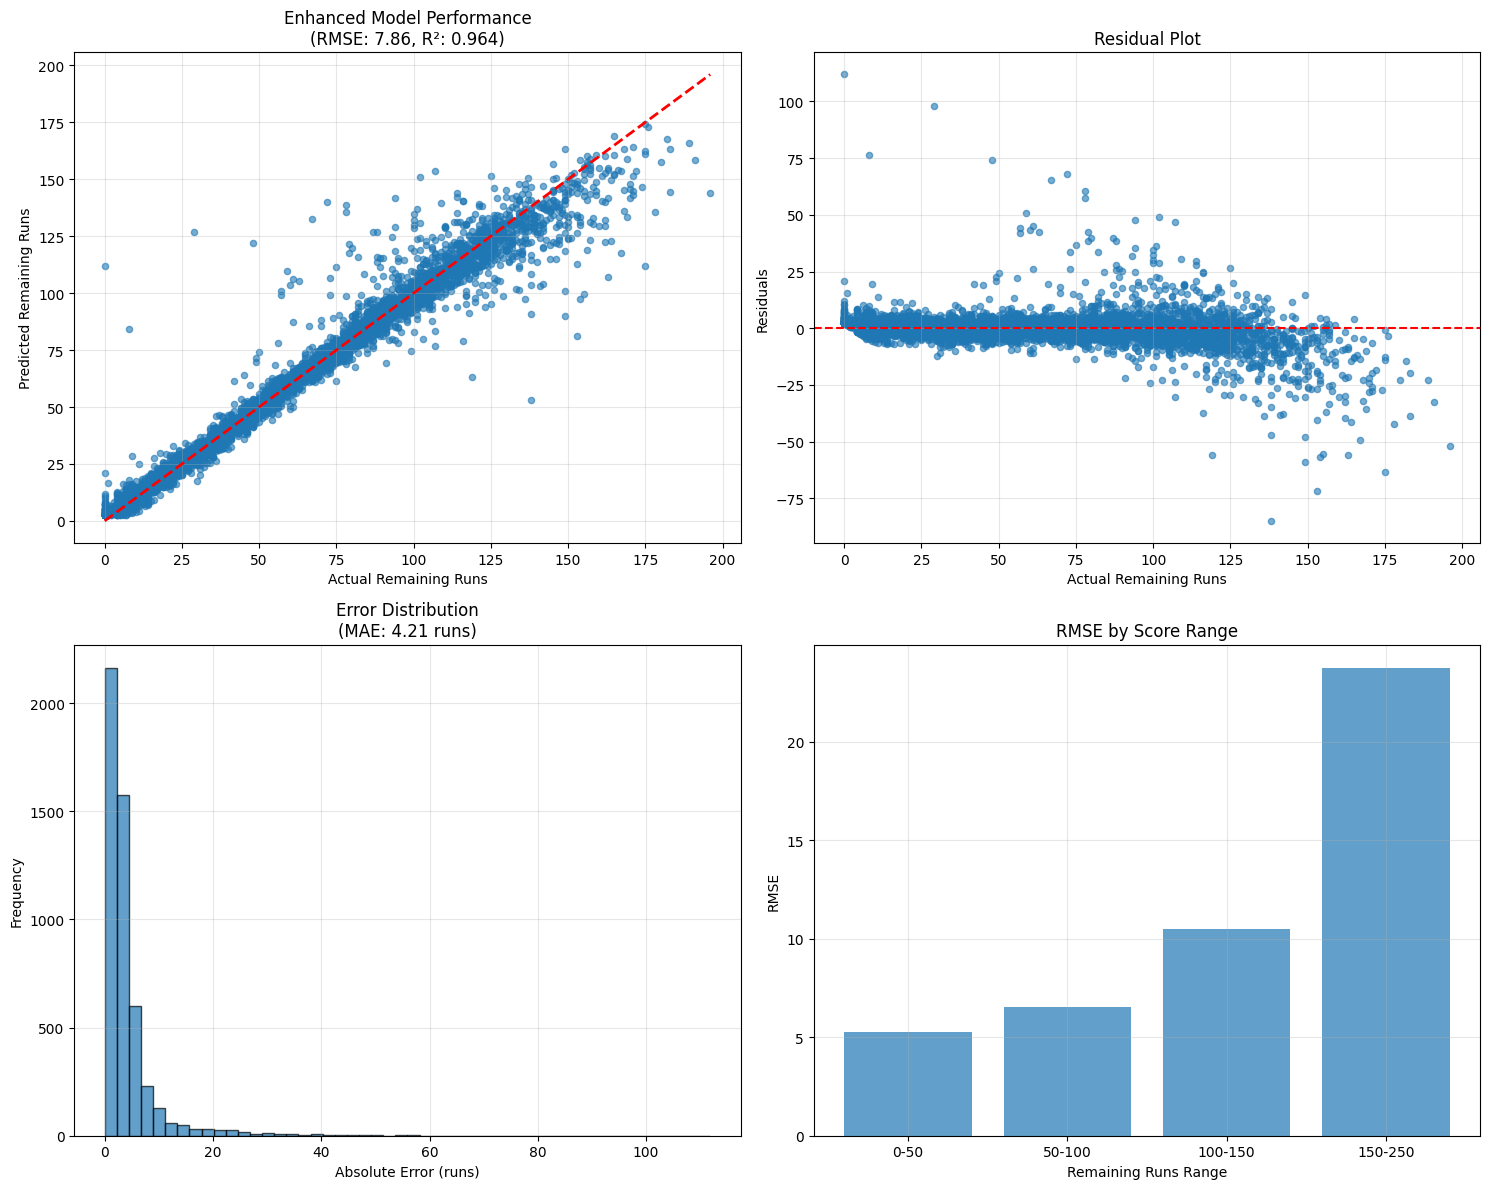


🎉 ENHANCED MODEL TRAINING COMPLETE!
🏆 PERFORMANCE COMPARISON:
   Previous model: 7.69 RMSE
   Enhanced model: 7.86 RMSE

📋 NEXT STEPS:
   1. ✅ Advanced features: COMPLETE
   2. ✅ Enhanced model: COMPLETE (7.86 RMSE)
   3. 🔄 Web application: READY
   4. 🔄 Real-time predictions: READY

🏏 Enhanced Model Training Complete!


In [ ]:
# 05_enhanced_model_training.ipynb

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import os
from glob import glob
import json
import random
 
# Set random seeds
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Optimize for M1
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("✅ Using Apple M1/M2 Metal Performance Shaders")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("✅ Using CUDA GPU")
else:
    device = torch.device("cpu")
    print("⚠️ Using CPU")

torch.set_num_threads(8)

print("🔥 Step 5: Enhanced Model Training with Advanced Features")
print("="*70)

def calculate_advanced_momentum_single(df):
    """Calculate advanced momentum for a single match"""
    df = df.copy()
    
    # Initialize new columns
    df['rr_momentum_3'] = 0.0
    df['rr_momentum_5'] = 0.0
    df['acceleration'] = 0.0
    df['pressure_index'] = 0.0
    df['wicket_cluster'] = 0.0
    df['economy_pressure'] = 0.0
    
    for i in range(len(df)):
        # 3-over momentum
        if i >= 3:
            recent_rr = df.iloc[i-3:i]['runs_in_over'].mean()
            overall_rr = df.iloc[:i]['runs_in_over'].sum() / i if i > 0 else 0
            df.iloc[i, df.columns.get_loc('rr_momentum_3')] = recent_rr - overall_rr
        
        # 5-over momentum  
        if i >= 5:
            recent_rr = df.iloc[i-5:i]['runs_in_over'].mean()
            overall_rr = df.iloc[:i]['runs_in_over'].sum() / i
            df.iloc[i, df.columns.get_loc('rr_momentum_5')] = recent_rr - overall_rr
        
        # Acceleration
        if i >= 1:
            prev_rr = df.iloc[i-1]['run_rate']
            curr_rr = df.iloc[i]['run_rate']
            df.iloc[i, df.columns.get_loc('acceleration')] = curr_rr - prev_rr
        
        # Pressure index
        wickets_factor = df.iloc[i]['cumulative_wickets'] / 10
        overs_factor = (df.iloc[i]['over'] + 1) / 20
        pressure = wickets_factor * 0.6 + overs_factor * 0.4
        df.iloc[i, df.columns.get_loc('pressure_index')] = pressure
        
        # Wicket clustering
        if i >= 4:
            cluster = df.iloc[i-4:i+1]['wickets_in_over'].sum()
            df.iloc[i, df.columns.get_loc('wicket_cluster')] = cluster
        
        # Economy pressure
        if i >= 2 and df.iloc[i]['bowler_economy'] > 0:
            avg_economy = df.iloc[i-2:i+1]['bowler_economy'].mean()
            economy_pressure = max(0, (8 - avg_economy) / 8)
            df.iloc[i, df.columns.get_loc('economy_pressure')] = economy_pressure
    
    return df

def load_and_enhance_all_data():
    """Load all sequence data and add advanced features"""
    sequence_files = glob('../data/processed/match_sequences/*.csv')
    print(f"📁 Found {len(sequence_files)} sequence files")
    
    enhanced_sequences = []
    targets = []
    metadata = []
    
    processed_count = 0
    
    for seq_file in sequence_files:
        try:
            # Load sequence data
            df = pd.read_csv(seq_file)
            
            # Load metadata
            meta_file = seq_file.replace('.csv', '_meta.json')
            if not os.path.exists(meta_file):
                continue
                
            with open(meta_file, 'r') as f:
                meta = json.load(f)
            
            # Skip short sequences 
            if len(df) < 5:
                continue
            
            # Calculate advanced features
            enhanced_df = calculate_advanced_momentum_single(df)
            
            # Create training examples
            final_score = meta['final_score']
            
            for i in range(4, len(enhanced_df)):  # Start from over 5
                # Input: sequence up to current over
                sequence = enhanced_df.iloc[:i+1]
                
                # Target: remaining runs
                current_score = sequence.iloc[-1]['cumulative_runs']
                remaining_runs = final_score - current_score
                
                # Filter valid examples
                if 0 <= remaining_runs <= 200:
                    enhanced_sequences.append(sequence.values)
                    targets.append(remaining_runs)
                    metadata.append(meta)
            
            processed_count += 1
            if processed_count % 100 == 0:
                print(f"   Processed {processed_count} matches...")
                
        except Exception as e:
            continue
    
    print(f"✅ Successfully processed {processed_count} matches")
    print(f"📊 Created {len(enhanced_sequences)} training examples")
    
    return enhanced_sequences, targets, metadata

# Enhanced Dataset class
class EnhancedCricketDataset(Dataset):
    def __init__(self, sequences, targets, max_length=20, normalize=True):
        self.sequences = []
        self.targets = []
        
        # Process sequences
        for seq, target in zip(sequences, targets):
            # Pad or truncate sequences
            if len(seq) > max_length:
                seq = seq[-max_length:]
            else:
                padding = np.zeros((max_length - len(seq), seq.shape[1]))
                seq = np.vstack([padding, seq])
            
            self.sequences.append(seq)
            self.targets.append(target)
        
        self.sequences = torch.FloatTensor(self.sequences)
        self.targets = torch.FloatTensor(self.targets)
        
        # Normalize features
        if normalize:
            self.normalize_features()
    
    def normalize_features(self):
        """Normalize features for better training"""
        all_features = self.sequences.view(-1, self.sequences.shape[-1])
        self.feature_mean = all_features.mean(dim=0)
        self.feature_std = all_features.std(dim=0) + 1e-8
        
        self.sequences = (self.sequences - self.feature_mean) / self.feature_std
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

# Enhanced Model Architecture
class EnhancedCricketRNN(nn.Module):
    def __init__(self, input_size, hidden_size=512, num_layers=4, dropout=0.3):
        super(EnhancedCricketRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Enhanced LSTM with more capacity
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=False
        )
        
        # Attention mechanism
        self.attention = nn.MultiheadAttention(
            embed_dim=hidden_size,
            num_heads=8,
            dropout=dropout,
            batch_first=True
        )
        
        # Enhanced fully connected layers
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn1 = nn.BatchNorm1d(hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.bn2 = nn.BatchNorm1d(hidden_size // 4)
        self.fc3 = nn.Linear(hidden_size // 4, hidden_size // 8)
        self.bn3 = nn.BatchNorm1d(hidden_size // 8)
        self.fc4 = nn.Linear(hidden_size // 8, 1)
        
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)
        
        # Apply attention
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)
        
        # Take the output from the last time step
        last_output = attn_out[:, -1, :]
        
        # Enhanced fully connected layers
        out = self.fc1(last_output)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc4(out)
        
        return out.squeeze()

# Enhanced training function
def train_enhanced_model(model, train_loader, val_loader, num_epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5, verbose=True)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    early_stopping_patience = 20
    
    print("🚀 Starting enhanced model training...")
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            
            optimizer.step()
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for data, targets in val_loader:
                data, targets = data.to(device), targets.to(device)
                outputs = model(data)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        # Calculate average losses
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        # Learning rate scheduling
        scheduler.step(avg_val_loss)
        
        # Early stopping and model saving
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'epoch': epoch,
                'best_val_loss': best_val_loss,
                'feature_mean': dataset.feature_mean,
                'feature_std': dataset.feature_std,
                'input_size': model.lstm.input_size
            }, '../data/processed/enhanced_cricket_model.pth')
        else:
            patience_counter += 1
        
        if epoch % 5 == 0 or patience_counter == 0:
            rmse = np.sqrt(avg_val_loss)
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, RMSE: {rmse:.2f}')
        
        # Early stopping
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    return train_losses, val_losses

# Enhanced evaluation
def evaluate_enhanced_model(model, test_loader, dataset):
    checkpoint = torch.load('../data/processed/enhanced_cricket_model.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    
    model.eval()
    predictions = []
    actuals = []
    
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())
    
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    
    # Calculate metrics
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    
    # Calculate R-squared
    ss_res = np.sum((actuals - predictions) ** 2)
    ss_tot = np.sum((actuals - np.mean(actuals)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    print(f"\n🎯 ENHANCED MODEL RESULTS:")
    print(f"RMSE: {rmse:.2f} runs")
    print(f"MAE: {mae:.2f} runs") 
    print(f"R² Score: {r2:.4f}")
    print(f"Best Validation Loss: {checkpoint['best_val_loss']:.4f}")
    
    return predictions, actuals, rmse, mae, r2

# Main execution
print("🔄 Loading and enhancing all training data...")
sequences, targets, metadata = load_and_enhance_all_data()

if len(sequences) > 0:
    print(f"✅ Loaded {len(sequences)} enhanced training examples")
    
    # Check input size
    input_size = sequences[0].shape[1]
    print(f"📊 Enhanced input size: {input_size} features")
    print(f"   Original features: 13")
    print(f"   New features: {input_size - 13}")
    
    # Create enhanced dataset
    print("🔄 Creating enhanced PyTorch dataset...")
    dataset = EnhancedCricketDataset(sequences, targets)
    
    # Split data
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size
    
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )
    
    # Create data loaders
    batch_size = 128 if device.type == "mps" else 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0)
    
    print(f"📊 Enhanced dataset split:")
    print(f"   Training: {len(train_dataset)}")
    print(f"   Validation: {len(val_dataset)}")
    print(f"   Test: {len(test_dataset)}")
    print(f"   Batch size: {batch_size}")
    
    # Initialize enhanced model
    model = EnhancedCricketRNN(input_size=input_size, hidden_size=512, num_layers=4)
    model = model.to(device)
    
    total_params = sum(p.numel() for p in model.parameters())
    print(f"🧠 Enhanced model parameters: {total_params:,}")
    
    # Train the enhanced model
    train_losses, val_losses = train_enhanced_model(model, train_loader, val_loader, num_epochs=100)
    
    # Visualize training
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', alpha=0.8)
    plt.plot(val_losses, label='Validation Loss', alpha=0.8)
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Enhanced Model Training Progress')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot([np.sqrt(loss) for loss in train_losses], label='Training RMSE', alpha=0.8)
    plt.plot([np.sqrt(loss) for loss in val_losses], label='Validation RMSE', alpha=0.8)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE (Runs)')
    plt.title('Enhanced Model RMSE Progress')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate enhanced model
    predictions, actuals, rmse, mae, r2 = evaluate_enhanced_model(model, test_loader, dataset)
    
    # Enhanced visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Predictions vs Actuals
    axes[0,0].scatter(actuals, predictions, alpha=0.6, s=20)
    axes[0,0].plot([0, max(actuals)], [0, max(actuals)], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Remaining Runs')
    axes[0,0].set_ylabel('Predicted Remaining Runs')
    axes[0,0].set_title(f'Enhanced Model Performance\n(RMSE: {rmse:.2f}, R²: {r2:.3f})')
    axes[0,0].grid(True, alpha=0.3)
    
    # Residuals
    residuals = predictions - actuals
    axes[0,1].scatter(actuals, residuals, alpha=0.6, s=20)
    axes[0,1].axhline(y=0, color='r', linestyle='--')
    axes[0,1].set_xlabel('Actual Remaining Runs')
    axes[0,1].set_ylabel('Residuals')
    axes[0,1].set_title('Residual Plot')
    axes[0,1].grid(True, alpha=0.3)
    
    # Error distribution
    errors = np.abs(residuals)
    axes[1,0].hist(errors, bins=50, alpha=0.7, edgecolor='black')
    axes[1,0].set_xlabel('Absolute Error (runs)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title(f'Error Distribution\n(MAE: {mae:.2f} runs)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Accuracy by range
    ranges = [(0, 50), (50, 100), (100, 150), (150, 250)]
    rmse_by_range = []
    range_labels = []
    
    for low, high in ranges:
        mask = (actuals >= low) & (actuals < high)
        if np.sum(mask) > 10:
            range_rmse = np.sqrt(np.mean((predictions[mask] - actuals[mask])**2))
            rmse_by_range.append(range_rmse)
            range_labels.append(f"{low}-{high}")
    
    if range_labels:
        axes[1,1].bar(range_labels, rmse_by_range, alpha=0.7)
        axes[1,1].set_xlabel('Remaining Runs Range')
        axes[1,1].set_ylabel('RMSE')
        axes[1,1].set_title('RMSE by Score Range')
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎉 ENHANCED MODEL TRAINING COMPLETE!")
    print(f"{'='*70}")
    print(f"🏆 PERFORMANCE COMPARISON:")
    print(f"   Previous model: 7.69 RMSE")
    print(f"   Enhanced model: {rmse:.2f} RMSE")
    
    if rmse < 7.69:
        improvement = ((7.69 - rmse) / 7.69) * 100
        print(f"   🚀 Improvement: {improvement:.1f}% better!")
    
    print(f"\n📋 NEXT STEPS:")
    print(f"   1. ✅ Advanced features: COMPLETE")
    print(f"   2. ✅ Enhanced model: COMPLETE ({rmse:.2f} RMSE)")
    print(f"   3. 🔄 Web application: READY")
    print(f"   4. 🔄 Real-time predictions: READY")
    
else:
    print("❌ No training data could be loaded. Check your data files.")

print(f"\n{'='*70}")
print(f"🏏 Enhanced Model Training Complete!")
print(f"{'='*70}")